## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [27]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

Text(0.5, 1.0, 'Image label: 1')

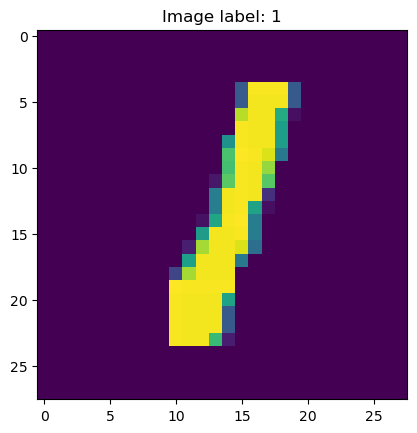

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=128,
    shuffle=True,
    num_workers=8
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=128,
    shuffle=False,
    num_workers=8
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Определение модели
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),  # уменьшаем размерность
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10),  # 10 классов (цифры 0-9)
            nn.Softmax(dim=1)  # Для классификации
        )

    def forward(self, x):
        return self.model(x)

# Инициализация модели
model = MLP()


Локальные тесты для проверки вашей модели доступны ниже:

In [4]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [8]:
# Гиперпараметры
epochs = 5
learning_rate = 0.0001


# Оптимизатор и функция потерь
criterion = nn.CrossEntropyLoss()  # Подходит для многоклассовой классификации
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(epochs):
    print(epoch)
    for data, labels in train_data_loader:
        data = data.view(-1, 28*28)  # преобразуем в вектор 784
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        print(loss)
        loss.backward()
        optimizer.step()



0
tensor(2.3035, grad_fn=<NllLossBackward0>)
tensor(2.3026, grad_fn=<NllLossBackward0>)
tensor(2.3033, grad_fn=<NllLossBackward0>)
tensor(2.3018, grad_fn=<NllLossBackward0>)
tensor(2.3013, grad_fn=<NllLossBackward0>)
tensor(2.3019, grad_fn=<NllLossBackward0>)
tensor(2.3005, grad_fn=<NllLossBackward0>)
tensor(2.3011, grad_fn=<NllLossBackward0>)
tensor(2.3010, grad_fn=<NllLossBackward0>)
tensor(2.3011, grad_fn=<NllLossBackward0>)
tensor(2.3007, grad_fn=<NllLossBackward0>)
tensor(2.3005, grad_fn=<NllLossBackward0>)
tensor(2.3002, grad_fn=<NllLossBackward0>)
tensor(2.2990, grad_fn=<NllLossBackward0>)
tensor(2.2992, grad_fn=<NllLossBackward0>)
tensor(2.2985, grad_fn=<NllLossBackward0>)
tensor(2.2982, grad_fn=<NllLossBackward0>)
tensor(2.2982, grad_fn=<NllLossBackward0>)
tensor(2.2975, grad_fn=<NllLossBackward0>)
tensor(2.2969, grad_fn=<NllLossBackward0>)
tensor(2.2979, grad_fn=<NllLossBackward0>)
tensor(2.2971, grad_fn=<NllLossBackward0>)
tensor(2.2969, grad_fn=<NllLossBackward0>)
tensor(2.

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [9]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [10]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.94165


In [11]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [12]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9388


## Хорошая демонстрация того, что делает каждый нейрон

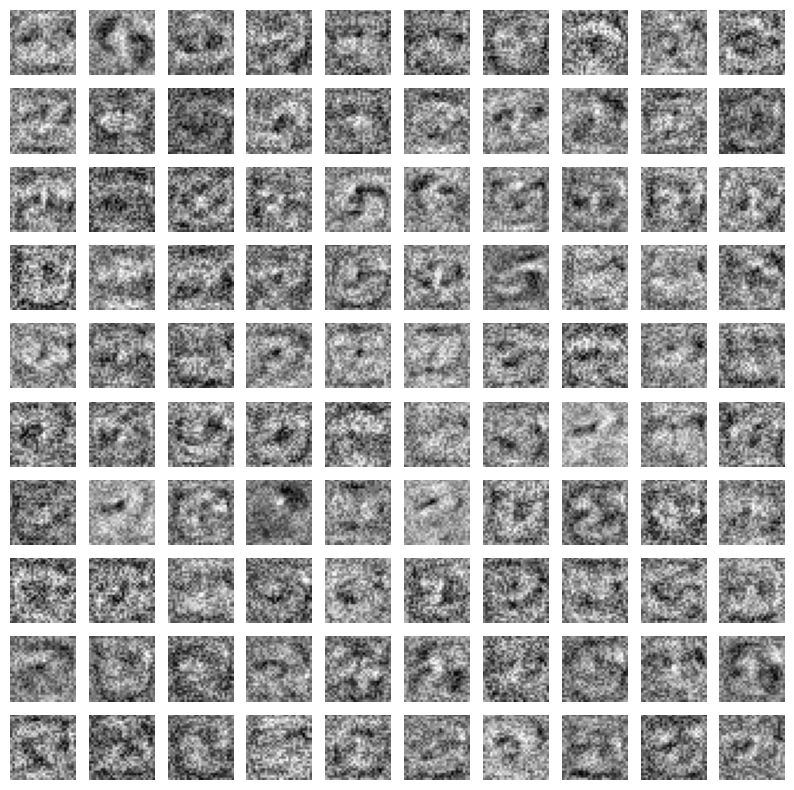

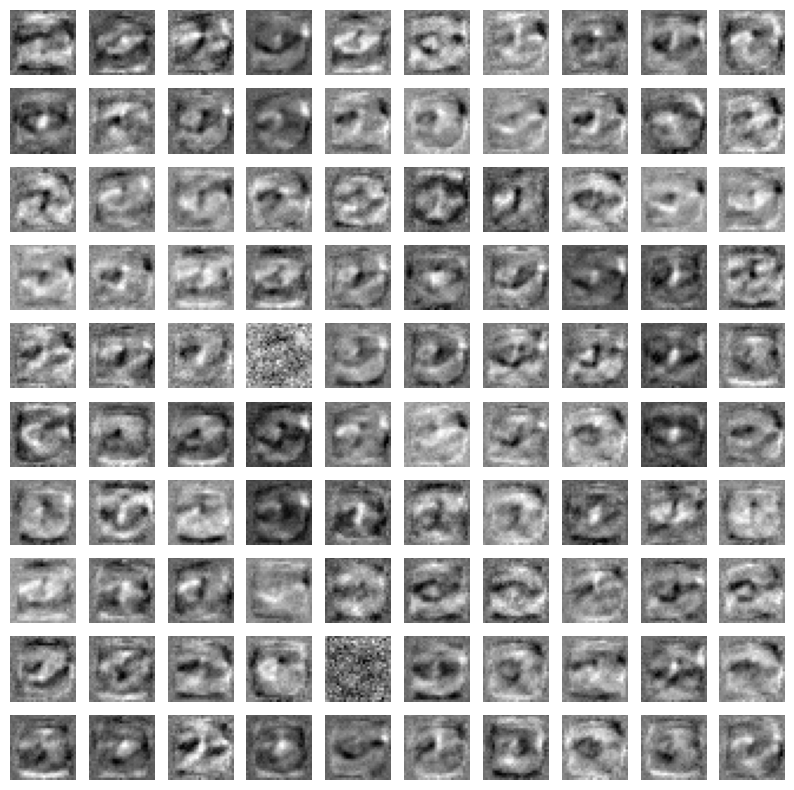

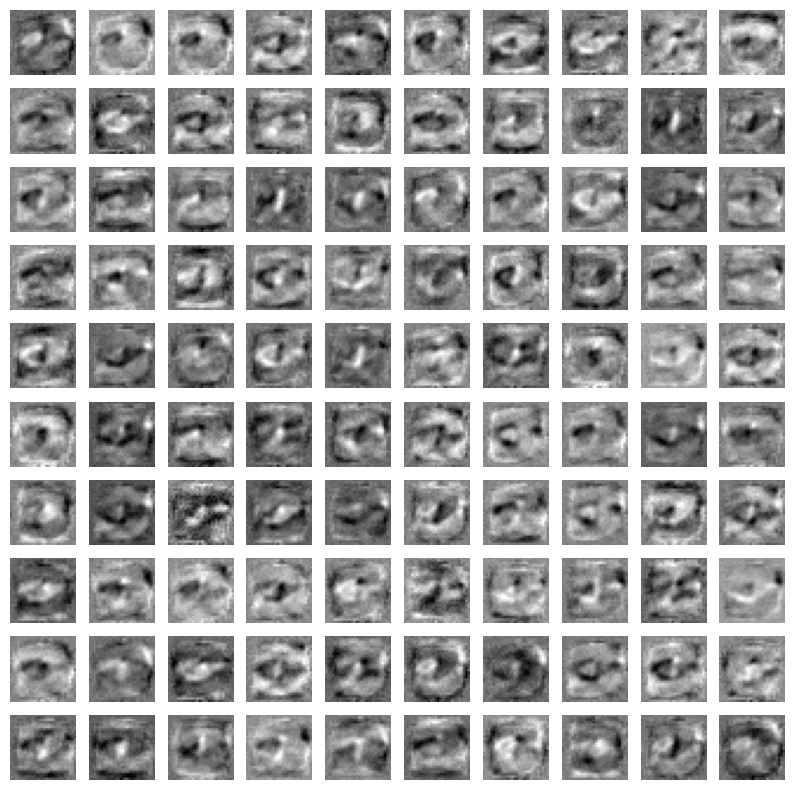

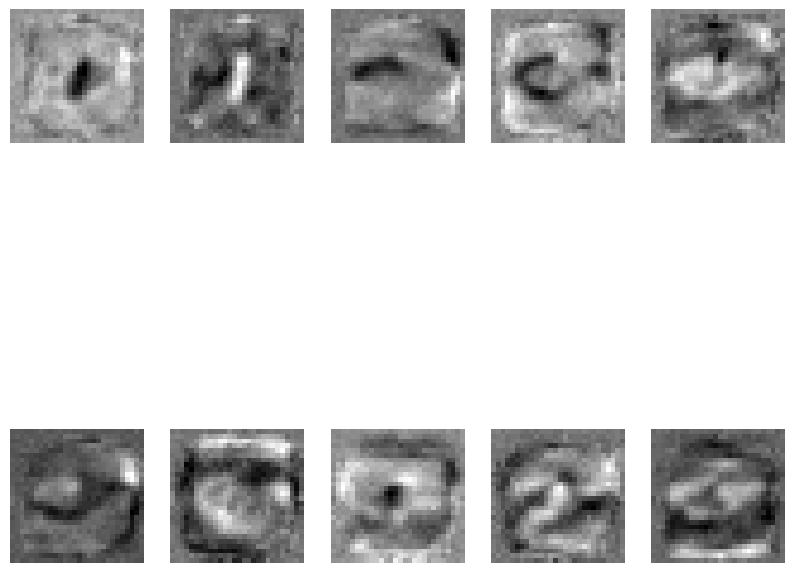

In [13]:
import matplotlib.pyplot as plt

nn_models_components = model.model

# Визуализация весов первого слоя
weights = nn_models_components[0].weight.data  # Веса первого слоя (512, 784)

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights[i].view(28, 28).cpu(), cmap='gray')
    ax.axis('off')
plt.show()

#---------------------------------------------------------------
weights = nn_models_components[2].weight.data   @  weights # Преобразуем в изображения 28x28
  # Преобразуем в изображения 28x28


# Рисуем первые 16 фильтров
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights[i].view(28, 28).cpu(), cmap='gray')
    ax.axis('off')
plt.show()


#---------------------------------------------------------------
weights = nn_models_components[4].weight.data   @  weights # Преобразуем в изображения 28x28
  # Преобразуем в изображения 28x28


# Рисуем первые 16 фильтров
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights[i].view(28, 28).cpu(), cmap='gray')
    ax.axis('off')
plt.show()


#---------------------------------------------------------------
weights = nn_models_components[6].weight.data   @  weights # Преобразуем в изображения 28x28
  # Преобразуем в изображения 28x28


# Рисуем первые 16 фильтров
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights[i].view(28, 28).cpu(), cmap='gray')
    ax.axis('off')
plt.show()

Проверка, что необходимые пороги пройдены:

In [14]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [17]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [ ]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

# print(submission_dict['test'])

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)

# print(np.load('submission_dict_hw07.npy', allow_pickle=True))

print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

{'train': array([0, 9, 0, 2, 8, 5, 7, 9, 4, 4, 0, 5, 7, 7, 0, 2, 4, 3, 5, 6, 7, 1,
       9, 5, 5, 7, 7, 2, 2, 2, 7, 2, 0, 1, 8, 6, 5, 2, 9, 6, 9, 8, 0, 4,
       4, 1, 9, 4, 9, 0, 3, 7, 7, 6, 3, 1, 3, 4, 0, 0, 3, 8, 0, 3, 1, 7,
       2, 5, 3, 5, 4, 2, 3, 4, 0, 1, 2, 1, 3, 2, 0, 8, 1, 7, 0, 2, 4, 5,
       0, 3, 1, 8, 9, 8, 8, 5, 9, 2, 9, 6, 3, 1, 5, 4, 3, 7, 0, 8, 6, 5,
       8, 6, 2, 4, 4, 8, 1, 5, 3, 6, 0, 6, 6, 8, 9, 9, 6, 7, 7, 7, 9, 0,
       6, 5, 7, 2, 0, 0, 5, 9, 7, 7, 9, 6, 8, 1, 3, 1, 5, 7, 1, 4, 4, 5,
       4, 2, 3, 8, 2, 0, 0, 3, 1, 0, 6, 4, 3, 6, 4, 4, 6, 2, 1, 8, 4, 3,
       7, 8, 8, 7, 9, 0, 3, 9, 9, 2, 3, 3, 9, 1, 1, 9, 6, 7, 8, 7, 6, 6,
       9, 3, 3, 2, 8, 2, 5, 4, 2, 2, 6, 9, 2, 7, 0, 8, 9, 6, 7, 0, 7, 6,
       1, 7, 1, 0, 9, 2, 2, 9, 3, 8, 0, 8, 6, 5, 1, 3, 2, 7, 9, 2, 0, 7,
       4, 9, 9, 6, 5, 9, 4, 6, 9, 2, 9, 5, 5, 3, 7, 6, 4, 3, 4, 0, 9, 3,
       3, 4, 8, 2, 6, 5, 1, 5, 8, 1, 5, 6, 0, 1, 1, 7, 6, 7, 5, 3, 1, 9,
       4, 8, 0, 6, 2, 1, 2, 4, 0, 7, 8, 1

На этом задание завершено. Поздравляем!